In [1]:
# ARC Simulation
from __future__ import division

from platform import python_version
print(python_version())

import argparse
import meep as mp
import time
import numpy as np
import matplotlib.pyplot as plt
from meep.materials import  cSi, SiO2
#from mayavi import mlab


3.9.6
Using MPI version 3.1, 1 processes


In [2]:
sx=10
sy=10
sz=10
eps_Si=12
eps_air=1
eps=4
T_Si=1
T_Arc=0.1
cell = mp.Vector3(sx, sy, sz)
pml_layers = [mp.PML(1.0)]
resolution = 50
nfreq = 100
fcen = 1.75  # pulse center frequency
df = 1.5  # pulse width (in frequency)

In [3]:
#geometry = [mp.Block(mp.Vector3(T_Si, sy, mp.inf), center=mp.Vector3(0, 0), material=mp.Medium(epsilon=eps_Si))]
geometry = [mp.Block(mp.Vector3(sx, sy, mp.inf), center=mp.Vector3(0, 0, 0), material=mp.Medium(epsilon=eps_air))]

In [4]:
sources = [mp.Source(mp.GaussianSource(fcen, fwidth=df), component=mp.Ez, center=mp.Vector3(2 + (-0.5 * sx), 0, 0), size=mp.Vector3(0, sy, sz))]

In [5]:
sim = mp.Simulation(cell_size=cell,
                    boundary_layers=pml_layers,
                    geometry=geometry,
                    sources=sources,
                    resolution=resolution)
refl_1_fr = mp.FluxRegion(center=mp.Vector3(-0.51, 0, 0), size=mp.Vector3(0, sy, sz))
refl_1 = sim.add_flux(fcen, df, nfreq, refl_1_fr)
tran_1_fr = mp.FluxRegion(center=mp.Vector3(0, 0, 0), size=mp.Vector3(0, sy, sz))
tran_1 = sim.add_flux(fcen, df, nfreq, tran_1_fr)
#plt.figure(dpi=600)
#sim.plot3D()
#plt.show()

In [6]:
pt = mp.Vector3(0, 0,0)
sim.run(mp.at_beginning(mp.output_epsilon),
                until_after_sources=mp.stop_when_fields_decayed(50, mp.Ez, pt, 1e-3))
no_ARC_refl_data = sim.get_flux_data(refl_1)

-----------
Initializing structure...
time for choose_chunkdivision = 0.000920057 s
Working in 3D dimensions.
Computational cell is 10 x 10 x 10 with resolution 50
     block, center = (0,0,0)
          size (10,10,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
subpixel-averaging is 53.3071% done, 3.504 s remaining
subpixel-averaging is 53.4037% done, 3.49061 s remaining
subpixel-averaging is 52.9447% done, 3.5557 s remaining
subpixel-averaging is 53.2708% done, 3.50921 s remaining
subpixel-averaging is 53.1379% done, 3.52798 s remaining
subpixel-averaging is 50.8187% done, 3.8716 s remaining
subpixel-averaging is 6.63243% done, 56.3107 s remaining
subpixel-averaging is 13.2712% done, 26.1456 s remaining
subpixel-averaging is 19.8831% done, 16.1186 s remaining
subpixel-averaging is 26.4967% done, 11.0981 s remaining
subpixel-averaging is 33.0724% done, 8.09559 s remaining
subpixel-averaging is 39.6513% done, 6.0883 s remaining
s

on time step 191 (time=1.91), 2.54365 s/step
on time step 193 (time=1.93), 2.55196 s/step
on time step 195 (time=1.95), 2.53848 s/step
on time step 197 (time=1.97), 2.53465 s/step
on time step 199 (time=1.99), 2.54012 s/step
on time step 201 (time=2.01), 2.54363 s/step
on time step 203 (time=2.03), 2.5346 s/step
on time step 205 (time=2.05), 2.53715 s/step
on time step 207 (time=2.07), 2.53612 s/step
on time step 209 (time=2.09), 2.53903 s/step
on time step 211 (time=2.11), 2.54148 s/step
on time step 213 (time=2.13), 2.54628 s/step
on time step 215 (time=2.15), 2.54378 s/step
on time step 217 (time=2.17), 2.54541 s/step
on time step 219 (time=2.19), 2.54217 s/step
on time step 221 (time=2.21), 2.54655 s/step
on time step 223 (time=2.23), 2.54299 s/step
on time step 225 (time=2.25), 2.54378 s/step
on time step 227 (time=2.27), 2.54095 s/step
on time step 229 (time=2.29), 2.54464 s/step
on time step 231 (time=2.31), 2.5479 s/step
on time step 233 (time=2.33), 2.54481 s/step
on time step

on time step 557 (time=5.57), 2.56843 s/step
on time step 559 (time=5.59), 2.55469 s/step
on time step 561 (time=5.61), 2.54846 s/step
on time step 563 (time=5.63), 2.55735 s/step
on time step 565 (time=5.65), 2.5601 s/step
on time step 567 (time=5.67), 2.57211 s/step
on time step 569 (time=5.69), 2.56477 s/step
on time step 571 (time=5.71), 2.55141 s/step
on time step 573 (time=5.73), 2.56288 s/step
on time step 575 (time=5.75), 2.55142 s/step
on time step 577 (time=5.77), 2.56274 s/step
on time step 579 (time=5.79), 2.55676 s/step
on time step 581 (time=5.81), 2.54914 s/step
on time step 583 (time=5.83), 2.55228 s/step
on time step 585 (time=5.85), 2.57445 s/step
on time step 587 (time=5.87), 2.5827 s/step
on time step 589 (time=5.89), 2.55394 s/step
on time step 591 (time=5.91), 2.55963 s/step
on time step 593 (time=5.93), 2.56056 s/step
on time step 595 (time=5.95), 2.55749 s/step
on time step 597 (time=5.97), 2.60231 s/step
on time step 599 (time=5.99), 2.558 s/step
on time step 6

on time step 923 (time=9.23), 2.55134 s/step
on time step 925 (time=9.25), 2.5496 s/step
on time step 927 (time=9.27), 2.55542 s/step
on time step 929 (time=9.29), 2.56083 s/step
on time step 931 (time=9.31), 2.5498 s/step
on time step 933 (time=9.33), 2.54675 s/step
on time step 935 (time=9.35), 2.5526 s/step
on time step 937 (time=9.37), 2.54971 s/step
on time step 939 (time=9.39), 2.54942 s/step
on time step 941 (time=9.41), 2.55685 s/step
on time step 943 (time=9.43), 2.55369 s/step
on time step 945 (time=9.45), 2.58836 s/step
on time step 947 (time=9.47), 2.55011 s/step
on time step 949 (time=9.49), 2.54808 s/step
on time step 951 (time=9.51), 2.56121 s/step
on time step 953 (time=9.53), 2.61534 s/step
on time step 955 (time=9.55), 2.54954 s/step
on time step 957 (time=9.57), 2.55487 s/step
on time step 959 (time=9.59), 2.55534 s/step
on time step 961 (time=9.61), 2.5471 s/step
on time step 963 (time=9.63), 2.54752 s/step
on time step 965 (time=9.65), 2.5516 s/step
on time step 96

on time step 1277 (time=12.77), 2.56274 s/step
on time step 1279 (time=12.79), 2.55854 s/step
on time step 1281 (time=12.81), 2.55966 s/step
on time step 1283 (time=12.83), 2.56385 s/step
on time step 1285 (time=12.85), 2.59707 s/step
on time step 1287 (time=12.87), 2.56306 s/step
on time step 1289 (time=12.89), 2.55875 s/step
on time step 1291 (time=12.91), 2.57356 s/step
on time step 1293 (time=12.93), 2.58459 s/step
on time step 1295 (time=12.95), 2.56633 s/step
on time step 1297 (time=12.97), 2.57142 s/step
on time step 1299 (time=12.99), 2.5558 s/step
on time step 1301 (time=13.01), 2.56043 s/step
on time step 1303 (time=13.03), 2.55735 s/step
on time step 1305 (time=13.05), 2.55981 s/step
on time step 1307 (time=13.07), 2.56832 s/step
on time step 1309 (time=13.09), 2.56326 s/step
on time step 1311 (time=13.11), 2.59533 s/step
on time step 1313 (time=13.13), 2.5634 s/step
on time step 1315 (time=13.15), 2.56877 s/step
on time step 1317 (time=13.17), 2.56531 s/step
on time step 13

on time step 1627 (time=16.27), 2.55664 s/step
on time step 1629 (time=16.29), 2.56194 s/step
on time step 1631 (time=16.31), 2.55591 s/step
on time step 1633 (time=16.33), 2.55713 s/step
on time step 1635 (time=16.35), 2.56178 s/step
on time step 1637 (time=16.37), 2.56345 s/step
on time step 1639 (time=16.39), 2.56126 s/step
on time step 1641 (time=16.41), 2.5628 s/step
on time step 1643 (time=16.43), 2.56946 s/step
on time step 1645 (time=16.45), 2.56221 s/step
on time step 1647 (time=16.47), 2.56638 s/step
on time step 1649 (time=16.49), 2.56261 s/step
on time step 1651 (time=16.51), 2.5621 s/step
on time step 1653 (time=16.53), 2.55841 s/step
on time step 1655 (time=16.55), 2.55487 s/step
on time step 1657 (time=16.57), 2.55653 s/step
on time step 1659 (time=16.59), 2.55519 s/step
on time step 1661 (time=16.61), 2.55739 s/step
on time step 1663 (time=16.63), 2.55614 s/step
on time step 1665 (time=16.65), 2.55727 s/step
on time step 1667 (time=16.67), 2.55644 s/step
on time step 16

on time step 1977 (time=19.77), 2.56335 s/step
on time step 1979 (time=19.79), 2.56136 s/step
on time step 1981 (time=19.81), 2.56091 s/step
on time step 1983 (time=19.83), 2.57293 s/step
on time step 1985 (time=19.85), 2.56372 s/step
on time step 1987 (time=19.87), 2.56248 s/step
on time step 1989 (time=19.89), 2.55493 s/step
on time step 1991 (time=19.91), 2.55679 s/step
on time step 1993 (time=19.93), 2.56105 s/step
on time step 1995 (time=19.95), 2.55553 s/step
on time step 1997 (time=19.97), 2.56092 s/step
on time step 1999 (time=19.99), 2.56059 s/step
on time step 2001 (time=20.01), 2.56299 s/step
on time step 2003 (time=20.03), 2.55797 s/step
on time step 2005 (time=20.05), 2.56228 s/step
on time step 2007 (time=20.07), 2.56603 s/step
on time step 2009 (time=20.09), 2.62649 s/step
on time step 2011 (time=20.11), 2.55941 s/step
on time step 2013 (time=20.13), 2.56081 s/step
on time step 2015 (time=20.15), 2.55901 s/step
on time step 2017 (time=20.17), 2.56381 s/step
on time step 

on time step 2327 (time=23.27), 2.5556 s/step
on time step 2329 (time=23.29), 2.55285 s/step
on time step 2331 (time=23.31), 2.55251 s/step
on time step 2333 (time=23.33), 2.55199 s/step
on time step 2335 (time=23.35), 2.55521 s/step
on time step 2337 (time=23.37), 2.55451 s/step
on time step 2339 (time=23.39), 2.554 s/step
on time step 2341 (time=23.41), 2.55113 s/step
on time step 2343 (time=23.43), 2.55845 s/step
on time step 2345 (time=23.45), 2.5611 s/step
on time step 2347 (time=23.47), 2.55927 s/step
on time step 2349 (time=23.49), 2.58153 s/step
on time step 2351 (time=23.51), 2.63227 s/step
on time step 2353 (time=23.53), 2.64645 s/step
on time step 2355 (time=23.55), 2.61024 s/step
on time step 2357 (time=23.57), 2.62452 s/step
on time step 2359 (time=23.59), 2.57701 s/step
on time step 2361 (time=23.61), 2.55994 s/step
on time step 2363 (time=23.63), 2.56141 s/step
on time step 2365 (time=23.65), 2.56677 s/step
on time step 2367 (time=23.67), 2.56236 s/step
on time step 2369

on time step 2677 (time=26.77), 2.55875 s/step
on time step 2679 (time=26.79), 2.55867 s/step
on time step 2681 (time=26.81), 2.55573 s/step
on time step 2683 (time=26.83), 2.55927 s/step
on time step 2685 (time=26.85), 2.55566 s/step
on time step 2687 (time=26.87), 2.55919 s/step
on time step 2689 (time=26.89), 2.55677 s/step
on time step 2691 (time=26.91), 2.55671 s/step
on time step 2693 (time=26.93), 2.55594 s/step
on time step 2695 (time=26.95), 2.55028 s/step
on time step 2697 (time=26.97), 2.55707 s/step
on time step 2699 (time=26.99), 2.55421 s/step
on time step 2701 (time=27.01), 2.55552 s/step
on time step 2703 (time=27.03), 2.55607 s/step
on time step 2705 (time=27.05), 2.55199 s/step
on time step 2707 (time=27.07), 2.55671 s/step
on time step 2709 (time=27.09), 2.56642 s/step
on time step 2711 (time=27.11), 2.55949 s/step
on time step 2713 (time=27.13), 2.56037 s/step
on time step 2715 (time=27.15), 2.55563 s/step
on time step 2717 (time=27.17), 2.56109 s/step
on time step 

on time step 3027 (time=30.27), 2.55599 s/step
on time step 3029 (time=30.29), 2.55237 s/step
on time step 3031 (time=30.31), 2.55526 s/step
on time step 3033 (time=30.33), 2.54952 s/step
on time step 3035 (time=30.35), 2.55321 s/step
on time step 3037 (time=30.37), 2.56235 s/step
on time step 3039 (time=30.39), 2.55279 s/step
on time step 3041 (time=30.41), 2.55448 s/step
on time step 3043 (time=30.43), 2.55272 s/step
on time step 3045 (time=30.45), 2.55566 s/step
on time step 3047 (time=30.47), 2.55568 s/step
on time step 3049 (time=30.49), 2.58579 s/step
on time step 3051 (time=30.51), 2.57499 s/step
on time step 3053 (time=30.53), 2.55618 s/step
on time step 3055 (time=30.55), 2.60428 s/step
on time step 3057 (time=30.57), 2.55844 s/step
on time step 3059 (time=30.59), 2.55812 s/step
on time step 3061 (time=30.61), 2.55229 s/step
on time step 3063 (time=30.63), 2.55141 s/step
on time step 3065 (time=30.65), 2.54971 s/step
on time step 3067 (time=30.67), 2.55594 s/step
on time step 

on time step 3377 (time=33.77), 2.56152 s/step
on time step 3379 (time=33.79), 2.56142 s/step
on time step 3381 (time=33.81), 2.55454 s/step
on time step 3383 (time=33.83), 2.55876 s/step
on time step 3385 (time=33.85), 2.5562 s/step
on time step 3387 (time=33.87), 2.55655 s/step
on time step 3389 (time=33.89), 2.54979 s/step
on time step 3391 (time=33.91), 2.55454 s/step
on time step 3393 (time=33.93), 2.55443 s/step
on time step 3395 (time=33.95), 2.5534 s/step
on time step 3397 (time=33.97), 2.55141 s/step
on time step 3399 (time=33.99), 2.55554 s/step
on time step 3401 (time=34.01), 2.5493 s/step
on time step 3403 (time=34.03), 2.55656 s/step
on time step 3405 (time=34.05), 2.55518 s/step
on time step 3407 (time=34.07), 2.55315 s/step
on time step 3409 (time=34.09), 2.55547 s/step
on time step 3411 (time=34.11), 2.55516 s/step
on time step 3413 (time=34.13), 2.55444 s/step
on time step 3415 (time=34.15), 2.55538 s/step
on time step 3417 (time=34.17), 2.55186 s/step
on time step 341

on time step 3727 (time=37.27), 2.56153 s/step
on time step 3729 (time=37.29), 2.56153 s/step
on time step 3731 (time=37.31), 2.56113 s/step
on time step 3733 (time=37.33), 2.56365 s/step
on time step 3735 (time=37.35), 2.56267 s/step
on time step 3737 (time=37.37), 2.56044 s/step
on time step 3739 (time=37.39), 2.56046 s/step
on time step 3741 (time=37.41), 2.56277 s/step
on time step 3743 (time=37.43), 2.56232 s/step
on time step 3745 (time=37.45), 2.56666 s/step
on time step 3747 (time=37.47), 2.56401 s/step
on time step 3749 (time=37.49), 2.56652 s/step
on time step 3751 (time=37.51), 2.57042 s/step
on time step 3753 (time=37.53), 2.5716 s/step
on time step 3755 (time=37.55), 2.56579 s/step
on time step 3757 (time=37.57), 2.56647 s/step
on time step 3759 (time=37.59), 2.56267 s/step
on time step 3761 (time=37.61), 2.5614 s/step
on time step 3763 (time=37.63), 2.56419 s/step
on time step 3765 (time=37.65), 2.55999 s/step
on time step 3767 (time=37.67), 2.55982 s/step
on time step 37

on time step 4077 (time=40.77), 2.61692 s/step
on time step 4079 (time=40.79), 2.61568 s/step
on time step 4081 (time=40.81), 2.61598 s/step
on time step 4083 (time=40.83), 2.61816 s/step
on time step 4085 (time=40.85), 2.61372 s/step
on time step 4087 (time=40.87), 2.6212 s/step
on time step 4089 (time=40.89), 2.62008 s/step
on time step 4091 (time=40.91), 2.62015 s/step
on time step 4093 (time=40.93), 2.65744 s/step
on time step 4095 (time=40.95), 2.65514 s/step
on time step 4097 (time=40.97), 2.61688 s/step
on time step 4099 (time=40.99), 2.61961 s/step
on time step 4101 (time=41.01), 2.61951 s/step
on time step 4103 (time=41.03), 2.6363 s/step
on time step 4105 (time=41.05), 2.62333 s/step
on time step 4107 (time=41.07), 2.63061 s/step
on time step 4109 (time=41.09), 2.61833 s/step
on time step 4111 (time=41.11), 2.6161 s/step
on time step 4113 (time=41.13), 2.61917 s/step
on time step 4115 (time=41.15), 2.61294 s/step
on time step 4117 (time=41.17), 2.62112 s/step
on time step 411

on time step 4427 (time=44.27), 2.61312 s/step
on time step 4429 (time=44.29), 2.61508 s/step
on time step 4431 (time=44.31), 2.61391 s/step
on time step 4433 (time=44.33), 2.6162 s/step
on time step 4435 (time=44.35), 2.6157 s/step
on time step 4437 (time=44.37), 2.6174 s/step
on time step 4439 (time=44.39), 2.62491 s/step
on time step 4441 (time=44.41), 2.61971 s/step
on time step 4443 (time=44.43), 2.61736 s/step
on time step 4445 (time=44.45), 2.62783 s/step
on time step 4447 (time=44.47), 2.61744 s/step
on time step 4449 (time=44.49), 2.61274 s/step
on time step 4451 (time=44.51), 2.61794 s/step
on time step 4453 (time=44.53), 2.61618 s/step
on time step 4455 (time=44.55), 2.61944 s/step
on time step 4457 (time=44.57), 2.61692 s/step
on time step 4459 (time=44.59), 2.62174 s/step
on time step 4461 (time=44.61), 2.61734 s/step
on time step 4463 (time=44.63), 2.61741 s/step
on time step 4465 (time=44.65), 2.61476 s/step
on time step 4467 (time=44.67), 2.61866 s/step
on time step 446

on time step 4777 (time=47.77), 2.55069 s/step
on time step 4779 (time=47.79), 2.56013 s/step
on time step 4781 (time=47.81), 2.58503 s/step
on time step 4783 (time=47.83), 2.55915 s/step
on time step 4785 (time=47.85), 2.5813 s/step
on time step 4787 (time=47.87), 2.55364 s/step
on time step 4789 (time=47.89), 2.55998 s/step
on time step 4791 (time=47.91), 2.59266 s/step
on time step 4793 (time=47.93), 2.54966 s/step
on time step 4795 (time=47.95), 2.55323 s/step
on time step 4797 (time=47.97), 2.55154 s/step
on time step 4799 (time=47.99), 2.55899 s/step
on time step 4801 (time=48.01), 2.55641 s/step
on time step 4803 (time=48.03), 2.5744 s/step
on time step 4805 (time=48.05), 2.55368 s/step
on time step 4807 (time=48.07), 2.55073 s/step
on time step 4809 (time=48.09), 2.54875 s/step
on time step 4811 (time=48.11), 2.5608 s/step
on time step 4813 (time=48.13), 2.55666 s/step
on time step 4815 (time=48.15), 2.55406 s/step
on time step 4817 (time=48.17), 2.54899 s/step
on time step 481

on time step 5125 (time=51.25), 2.56179 s/step
on time step 5127 (time=51.27), 2.56299 s/step
on time step 5129 (time=51.29), 2.56415 s/step
on time step 5131 (time=51.31), 2.56591 s/step
on time step 5133 (time=51.33), 2.56382 s/step
on time step 5135 (time=51.35), 2.56904 s/step
on time step 5137 (time=51.37), 2.58653 s/step
on time step 5139 (time=51.39), 2.57458 s/step
on time step 5141 (time=51.41), 2.56679 s/step
on time step 5143 (time=51.43), 2.564 s/step
on time step 5145 (time=51.45), 2.56431 s/step
on time step 5147 (time=51.47), 2.56024 s/step
on time step 5149 (time=51.49), 2.56394 s/step
on time step 5151 (time=51.51), 2.57099 s/step
on time step 5153 (time=51.53), 2.61719 s/step
on time step 5155 (time=51.55), 2.61385 s/step
on time step 5157 (time=51.57), 2.56349 s/step
on time step 5159 (time=51.59), 2.56544 s/step
on time step 5161 (time=51.61), 2.56695 s/step
on time step 5163 (time=51.63), 2.56367 s/step
on time step 5165 (time=51.65), 2.6003 s/step
on time step 516

on time step 5475 (time=54.75), 2.55374 s/step
on time step 5477 (time=54.77), 2.56346 s/step
on time step 5479 (time=54.79), 2.58259 s/step
on time step 5481 (time=54.81), 2.57989 s/step
on time step 5483 (time=54.83), 2.55551 s/step
on time step 5485 (time=54.85), 2.55496 s/step
on time step 5487 (time=54.87), 2.56124 s/step
on time step 5489 (time=54.89), 2.5559 s/step
on time step 5491 (time=54.91), 2.56036 s/step
on time step 5493 (time=54.93), 2.56293 s/step
on time step 5495 (time=54.95), 2.55172 s/step
on time step 5497 (time=54.97), 2.55475 s/step
on time step 5499 (time=54.99), 2.56828 s/step
on time step 5501 (time=55.01), 2.55322 s/step
on time step 5503 (time=55.03), 2.54959 s/step
on time step 5505 (time=55.05), 2.55424 s/step
on time step 5507 (time=55.07), 2.55484 s/step
on time step 5509 (time=55.09), 2.55466 s/step
on time step 5511 (time=55.11), 2.55608 s/step
on time step 5513 (time=55.13), 2.56957 s/step
on time step 5515 (time=55.15), 2.56832 s/step
on time step 5

on time step 5825 (time=58.25), 2.55889 s/step
on time step 5827 (time=58.27), 2.56162 s/step
on time step 5829 (time=58.29), 2.57185 s/step
on time step 5831 (time=58.31), 2.56711 s/step
on time step 5833 (time=58.33), 2.54959 s/step
on time step 5835 (time=58.35), 2.55004 s/step
on time step 5837 (time=58.37), 2.56655 s/step
on time step 5839 (time=58.39), 2.56096 s/step
on time step 5841 (time=58.41), 2.57474 s/step
on time step 5843 (time=58.43), 2.56607 s/step
on time step 5845 (time=58.45), 2.58944 s/step
on time step 5847 (time=58.47), 2.55689 s/step
on time step 5849 (time=58.49), 2.55348 s/step
on time step 5851 (time=58.51), 2.55606 s/step
on time step 5853 (time=58.53), 2.56713 s/step
on time step 5855 (time=58.55), 2.55236 s/step
on time step 5857 (time=58.57), 2.55482 s/step
on time step 5859 (time=58.59), 2.5642 s/step
on time step 5861 (time=58.61), 2.54811 s/step
on time step 5863 (time=58.63), 2.55503 s/step
on time step 5865 (time=58.65), 2.55572 s/step
on time step 5

on time step 6175 (time=61.75), 2.56432 s/step
on time step 6177 (time=61.77), 2.56224 s/step
on time step 6179 (time=61.79), 2.56891 s/step
on time step 6181 (time=61.81), 2.56631 s/step
on time step 6183 (time=61.83), 2.56185 s/step
on time step 6185 (time=61.85), 2.57433 s/step
on time step 6187 (time=61.87), 2.58981 s/step
on time step 6189 (time=61.89), 2.56292 s/step
on time step 6191 (time=61.91), 2.56647 s/step
on time step 6193 (time=61.93), 2.56715 s/step
on time step 6195 (time=61.95), 2.57264 s/step
on time step 6197 (time=61.97), 2.56345 s/step
on time step 6199 (time=61.99), 2.55958 s/step
on time step 6201 (time=62.01), 2.55965 s/step
on time step 6203 (time=62.03), 2.56269 s/step
on time step 6205 (time=62.05), 2.5641 s/step
on time step 6207 (time=62.07), 2.56004 s/step
on time step 6209 (time=62.09), 2.55884 s/step
on time step 6211 (time=62.11), 2.5668 s/step
on time step 6213 (time=62.13), 2.61028 s/step
on time step 6215 (time=62.15), 2.56455 s/step
on time step 62

on time step 6525 (time=65.25), 2.56154 s/step
on time step 6527 (time=65.27), 2.62831 s/step
on time step 6529 (time=65.29), 2.58198 s/step
on time step 6531 (time=65.31), 2.54738 s/step
on time step 6533 (time=65.33), 2.54851 s/step
on time step 6535 (time=65.35), 2.54866 s/step
on time step 6537 (time=65.37), 2.56556 s/step
on time step 6539 (time=65.39), 2.55686 s/step
on time step 6541 (time=65.41), 2.62662 s/step
on time step 6543 (time=65.43), 2.55023 s/step
on time step 6545 (time=65.45), 2.54956 s/step
on time step 6547 (time=65.47), 2.55234 s/step
on time step 6549 (time=65.49), 2.55115 s/step
on time step 6551 (time=65.51), 2.5504 s/step
on time step 6553 (time=65.53), 2.56747 s/step
on time step 6555 (time=65.55), 2.5497 s/step
on time step 6557 (time=65.57), 2.55446 s/step
on time step 6559 (time=65.59), 2.54759 s/step
on time step 6561 (time=65.61), 2.54678 s/step
on time step 6563 (time=65.63), 2.54628 s/step
on time step 6565 (time=65.65), 2.54958 s/step
on time step 65

on time step 6875 (time=68.75), 2.59182 s/step
on time step 6877 (time=68.77), 2.55238 s/step
on time step 6879 (time=68.79), 2.56215 s/step
on time step 6881 (time=68.81), 2.55363 s/step
on time step 6883 (time=68.83), 2.54983 s/step
on time step 6885 (time=68.85), 2.54957 s/step
on time step 6887 (time=68.87), 2.55707 s/step
on time step 6889 (time=68.89), 2.55811 s/step
on time step 6891 (time=68.91), 2.54689 s/step
on time step 6893 (time=68.93), 2.55009 s/step
on time step 6895 (time=68.95), 2.54757 s/step
on time step 6897 (time=68.97), 2.55175 s/step
on time step 6899 (time=68.99), 2.54924 s/step
on time step 6901 (time=69.01), 2.55249 s/step
on time step 6903 (time=69.03), 2.55 s/step
on time step 6905 (time=69.05), 2.54832 s/step
on time step 6907 (time=69.07), 2.62711 s/step
on time step 6909 (time=69.09), 2.54687 s/step
on time step 6911 (time=69.11), 2.54607 s/step
on time step 6913 (time=69.13), 2.54856 s/step
on time step 6915 (time=69.15), 2.56018 s/step
on time step 691

on time step 7225 (time=72.25), 2.5658 s/step
on time step 7227 (time=72.27), 2.56498 s/step
on time step 7229 (time=72.29), 2.64679 s/step
on time step 7231 (time=72.31), 2.56691 s/step
on time step 7233 (time=72.33), 2.57032 s/step
on time step 7235 (time=72.35), 2.56175 s/step
on time step 7237 (time=72.37), 2.58319 s/step
on time step 7239 (time=72.39), 2.56571 s/step
on time step 7241 (time=72.41), 2.56504 s/step
on time step 7243 (time=72.43), 2.56795 s/step
on time step 7245 (time=72.45), 2.55495 s/step
on time step 7247 (time=72.47), 2.56551 s/step
on time step 7249 (time=72.49), 2.5593 s/step
on time step 7251 (time=72.51), 2.5626 s/step
on time step 7253 (time=72.53), 2.55946 s/step
on time step 7255 (time=72.55), 2.56177 s/step
on time step 7257 (time=72.57), 2.56426 s/step
on time step 7259 (time=72.59), 2.5599 s/step
on time step 7261 (time=72.61), 2.55903 s/step
on time step 7263 (time=72.63), 2.55495 s/step
on time step 7265 (time=72.65), 2.58071 s/step
on time step 7267

on time step 7575 (time=75.75), 2.55681 s/step
on time step 7577 (time=75.77), 2.54885 s/step
on time step 7579 (time=75.79), 2.55262 s/step
on time step 7581 (time=75.81), 2.55069 s/step
on time step 7583 (time=75.83), 2.55547 s/step
on time step 7585 (time=75.85), 2.56819 s/step
on time step 7587 (time=75.87), 2.55899 s/step
on time step 7589 (time=75.89), 2.54943 s/step
on time step 7591 (time=75.91), 2.55521 s/step
on time step 7593 (time=75.93), 2.59077 s/step
on time step 7595 (time=75.95), 2.55817 s/step
on time step 7597 (time=75.97), 2.5486 s/step
on time step 7599 (time=75.99), 2.57139 s/step
on time step 7601 (time=76.01), 2.56371 s/step
on time step 7603 (time=76.03), 2.54921 s/step
on time step 7605 (time=76.05), 2.55134 s/step
on time step 7607 (time=76.07), 2.55037 s/step
on time step 7609 (time=76.09), 2.54889 s/step
on time step 7611 (time=76.11), 2.55739 s/step
on time step 7613 (time=76.13), 2.55385 s/step
on time step 7615 (time=76.15), 2.58331 s/step
on time step 7

on time step 7925 (time=79.25), 2.56362 s/step
on time step 7927 (time=79.27), 2.56505 s/step
on time step 7929 (time=79.29), 2.56212 s/step
on time step 7931 (time=79.31), 2.5614 s/step
on time step 7933 (time=79.33), 2.55847 s/step
on time step 7935 (time=79.35), 2.55724 s/step
on time step 7937 (time=79.37), 2.56201 s/step
on time step 7939 (time=79.39), 2.5612 s/step
on time step 7941 (time=79.41), 2.57591 s/step
on time step 7943 (time=79.43), 2.57092 s/step
on time step 7945 (time=79.45), 2.56676 s/step
on time step 7947 (time=79.47), 2.55955 s/step
on time step 7949 (time=79.49), 2.55667 s/step
on time step 7951 (time=79.51), 2.56165 s/step
on time step 7953 (time=79.53), 2.55632 s/step
on time step 7955 (time=79.55), 2.55823 s/step
on time step 7957 (time=79.57), 2.5986 s/step
on time step 7959 (time=79.59), 2.55798 s/step
on time step 7961 (time=79.61), 2.56108 s/step
on time step 7963 (time=79.63), 2.56278 s/step
on time step 7965 (time=79.65), 2.55582 s/step
on time step 796

on time step 8275 (time=82.75), 2.61085 s/step
on time step 8277 (time=82.77), 2.61209 s/step
on time step 8279 (time=82.79), 2.61487 s/step
on time step 8281 (time=82.81), 2.62392 s/step
on time step 8283 (time=82.83), 2.60959 s/step
on time step 8285 (time=82.85), 2.61728 s/step
on time step 8287 (time=82.87), 2.61949 s/step
on time step 8289 (time=82.89), 2.65473 s/step
on time step 8291 (time=82.91), 2.6148 s/step
on time step 8293 (time=82.93), 2.62299 s/step
on time step 8295 (time=82.95), 2.62321 s/step
on time step 8297 (time=82.97), 2.62016 s/step
on time step 8299 (time=82.99), 2.60928 s/step
on time step 8301 (time=83.01), 2.61413 s/step
on time step 8303 (time=83.03), 2.61388 s/step
on time step 8305 (time=83.05), 2.6127 s/step
on time step 8307 (time=83.07), 2.61209 s/step
on time step 8309 (time=83.09), 2.6153 s/step
on time step 8311 (time=83.11), 2.61416 s/step
on time step 8313 (time=83.13), 2.62363 s/step
on time step 8315 (time=83.15), 2.62711 s/step
on time step 831

on time step 8625 (time=86.25), 2.5868 s/step
on time step 8627 (time=86.27), 2.58006 s/step
on time step 8629 (time=86.29), 2.59472 s/step
on time step 8631 (time=86.31), 2.60903 s/step
on time step 8633 (time=86.33), 2.6143 s/step
on time step 8635 (time=86.35), 2.60585 s/step
on time step 8637 (time=86.37), 2.56898 s/step
on time step 8639 (time=86.39), 2.59242 s/step
on time step 8641 (time=86.41), 2.61758 s/step
on time step 8643 (time=86.43), 2.61173 s/step
on time step 8645 (time=86.45), 2.60939 s/step
on time step 8647 (time=86.47), 2.64147 s/step
on time step 8649 (time=86.49), 2.61394 s/step
on time step 8651 (time=86.51), 2.61795 s/step
on time step 8653 (time=86.53), 2.61466 s/step
on time step 8655 (time=86.55), 2.5894 s/step
on time step 8657 (time=86.57), 2.58781 s/step
on time step 8659 (time=86.59), 2.61808 s/step
on time step 8661 (time=86.61), 2.623 s/step
on time step 8663 (time=86.63), 2.61831 s/step
on time step 8665 (time=86.65), 2.61572 s/step
on time step 8667 

on time step 8975 (time=89.75), 2.54713 s/step
on time step 8977 (time=89.77), 2.54725 s/step
on time step 8979 (time=89.79), 2.55299 s/step
on time step 8981 (time=89.81), 2.55263 s/step
on time step 8983 (time=89.83), 2.56111 s/step
on time step 8985 (time=89.85), 2.55276 s/step
on time step 8987 (time=89.87), 2.55001 s/step
on time step 8989 (time=89.89), 2.55143 s/step
on time step 8991 (time=89.91), 2.5801 s/step
on time step 8993 (time=89.93), 2.55265 s/step
on time step 8995 (time=89.95), 2.62895 s/step
on time step 8997 (time=89.97), 2.56497 s/step
on time step 8999 (time=89.99), 2.5921 s/step
on time step 9001 (time=90.01), 2.54935 s/step
on time step 9003 (time=90.03), 2.54624 s/step
on time step 9005 (time=90.05), 2.56313 s/step
on time step 9007 (time=90.07), 2.60043 s/step
on time step 9009 (time=90.09), 2.61047 s/step
on time step 9011 (time=90.11), 2.56331 s/step
on time step 9013 (time=90.13), 2.55632 s/step
on time step 9015 (time=90.15), 2.5963 s/step
on time step 901

on time step 9325 (time=93.25), 2.56163 s/step
on time step 9327 (time=93.27), 2.56308 s/step
on time step 9329 (time=93.29), 2.5636 s/step
on time step 9331 (time=93.31), 2.55696 s/step
on time step 9333 (time=93.33), 2.56409 s/step
on time step 9335 (time=93.35), 2.56991 s/step
on time step 9337 (time=93.37), 2.56256 s/step
on time step 9339 (time=93.39), 2.57485 s/step
on time step 9341 (time=93.41), 2.57191 s/step
on time step 9343 (time=93.43), 2.58162 s/step
on time step 9345 (time=93.45), 2.57061 s/step
on time step 9347 (time=93.47), 2.56071 s/step
on time step 9349 (time=93.49), 2.56051 s/step
on time step 9351 (time=93.51), 2.56384 s/step
on time step 9353 (time=93.53), 2.57297 s/step
on time step 9355 (time=93.55), 2.56102 s/step
on time step 9357 (time=93.57), 2.57157 s/step
on time step 9359 (time=93.59), 2.56111 s/step
on time step 9361 (time=93.61), 2.56182 s/step
on time step 9363 (time=93.63), 2.56218 s/step
on time step 9365 (time=93.65), 2.56705 s/step
on time step 9

on time step 9675 (time=96.75), 2.54818 s/step
on time step 9677 (time=96.77), 2.60318 s/step
on time step 9679 (time=96.79), 2.5524 s/step
on time step 9681 (time=96.81), 2.55151 s/step
on time step 9683 (time=96.83), 2.54991 s/step
on time step 9685 (time=96.85), 2.55332 s/step
on time step 9687 (time=96.87), 2.55256 s/step
on time step 9689 (time=96.89), 2.55111 s/step
on time step 9691 (time=96.91), 2.5458 s/step
on time step 9693 (time=96.93), 2.54861 s/step
on time step 9695 (time=96.95), 2.55444 s/step
on time step 9697 (time=96.97), 2.55395 s/step
on time step 9699 (time=96.99), 2.55551 s/step
on time step 9701 (time=97.01), 2.55188 s/step
on time step 9703 (time=97.03), 2.55693 s/step
on time step 9705 (time=97.05), 2.5452 s/step
on time step 9707 (time=97.07), 2.55122 s/step
on time step 9709 (time=97.09), 2.58895 s/step
on time step 9711 (time=97.11), 2.56201 s/step
on time step 9713 (time=97.13), 2.55698 s/step
on time step 9715 (time=97.15), 2.55585 s/step
on time step 971

In [7]:
no_ARC_tran_flux = mp.get_fluxes(tran_1)
no_ARC_refl_flux = mp.get_fluxes(refl_1)

In [8]:
sim.reset_meep()
from meep.materials import Si3N4
geometry = [mp.Block(mp.Vector3(T_Si, sy, mp.inf), center=mp.Vector3(0, 0, 0),
                         material=cSi),
            mp.Block(mp.Vector3(T_Arc, sy, mp.inf), center=mp.Vector3(-0.5 * (T_Si + T_Arc), 0, 0),
                         material=Si3N4)
           ]
sim = mp.Simulation(cell_size=cell,
                    boundary_layers=pml_layers,
                    geometry=geometry,
                    sources=sources,
                    resolution=resolution)
refl_1_fr = mp.FluxRegion(center=mp.Vector3(-0.61, 0, 0), size=mp.Vector3(0, sy, sz))
refl_1 = sim.add_flux(fcen, df, nfreq, refl_1_fr)
tran_1_fr = mp.FluxRegion(center=mp.Vector3(0, 0, 0), size=mp.Vector3(0, sy, sz))
tran_1 = sim.add_flux(fcen, df, nfreq, tran_1_fr)

sim.load_minus_flux_data(refl_1, no_ARC_refl_data)
pt = mp.Vector3(0, 0, 0)
sim.run(mp.at_beginning(mp.output_epsilon),
                until_after_sources=mp.stop_when_fields_decayed(50, mp.Ez, pt, 1e-3))

with_ARC_refl_flux = mp.get_fluxes(refl_1)
with_ARC_tran_flux = mp.get_fluxes(tran_1)

flux_freqs = mp.get_flux_freqs(refl_1)

#plt.figure(dpi=600)
#sim.plot2D()
#plt.show()


-----------
Initializing structure...
time for choose_chunkdivision = 0.00387287 s
Working in 3D dimensions.
Computational cell is 10 x 10 x 10 with resolution 50
     block, center = (0,0,0)
          size (1,10,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (-0.55,0,0)
          size (0.1,10,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
subpixel-averaging is 85.946% done, 0.654111 s remaining
subpixel-averaging is 86.8399% done, 0.606244 s remaining
subpixel-averaging is 87.9391% done, 0.54861 s remaining
subpixel-averaging is 87.6371% done, 0.564297 s remaining
subpixel-averaging is 13.7025% done, 25.1933 s remaining
subpixel-averaging is 26.7407% done, 10.9589 s remaining
subpixel-averaging is 39.7694% done, 6.05805 s remaining
subpixel-averaging is 46.109% done, 4.67528 s remaining
subpixel-averaging is 52.6265% done, 3.60116 s remaining
subpixe

/opt/anaconda/anaconda3/envs/pmp/lib/python3.9/site-packages/meep/simulation.py:1330: RuntimeWarning: Note: your sources include frequencies outside the range of validity of the material models. This is fine as long as you eventually only look at outputs (fluxes, resonant modes, etc.) at valid frequencies.
  warnings.warn(warn_src, RuntimeWarning)
/opt/anaconda/anaconda3/envs/pmp/lib/python3.9/site-packages/meep/simulation.py:1334: RuntimeWarning: DFT frequency 1.0 is out of material's range of 1.2048192771084338-2.5
  warnings.warn(warn_dft_fmt.format(dftf, min_freq, max_freq), RuntimeWarning)


on time step 1 (time=0.01), 77.8576 s/step
on time step 2 (time=0.02), 6.90294 s/step
on time step 3 (time=0.03), 6.91677 s/step
on time step 4 (time=0.04), 6.91405 s/step
on time step 5 (time=0.05), 6.90785 s/step
on time step 6 (time=0.06), 6.90437 s/step
on time step 7 (time=0.07), 6.92875 s/step
on time step 8 (time=0.08), 6.91817 s/step
on time step 9 (time=0.09), 6.91686 s/step
on time step 10 (time=0.1), 6.89798 s/step
on time step 11 (time=0.11), 6.9073 s/step
on time step 12 (time=0.12), 6.89654 s/step
on time step 13 (time=0.13), 6.90253 s/step
on time step 14 (time=0.14), 6.89782 s/step
on time step 15 (time=0.15), 6.909 s/step
on time step 16 (time=0.16), 6.95303 s/step
on time step 17 (time=0.17), 7.07511 s/step
on time step 18 (time=0.18), 7.11137 s/step
on time step 19 (time=0.19), 7.08968 s/step
on time step 20 (time=0.2), 7.12599 s/step
on time step 21 (time=0.21), 7.11852 s/step
on time step 22 (time=0.22), 7.09863 s/step
on time step 23 (time=0.23), 7.1604 s/step
on 

on time step 202 (time=2.02), 7.18073 s/step
on time step 203 (time=2.03), 7.1271 s/step
on time step 204 (time=2.04), 7.1263 s/step
on time step 205 (time=2.05), 7.1362 s/step
on time step 206 (time=2.06), 7.13878 s/step
on time step 207 (time=2.07), 7.20695 s/step
on time step 208 (time=2.08), 7.13098 s/step
on time step 209 (time=2.09), 7.16196 s/step
on time step 210 (time=2.1), 7.11616 s/step
on time step 211 (time=2.11), 7.14141 s/step
on time step 212 (time=2.12), 7.1325 s/step
on time step 213 (time=2.13), 7.12309 s/step
on time step 214 (time=2.14), 7.11275 s/step
on time step 215 (time=2.15), 7.09362 s/step
on time step 216 (time=2.16), 7.142 s/step
on time step 217 (time=2.17), 7.13204 s/step
on time step 218 (time=2.18), 7.11996 s/step
on time step 219 (time=2.19), 7.15813 s/step
on time step 220 (time=2.2), 7.11716 s/step
on time step 221 (time=2.21), 7.12451 s/step
on time step 222 (time=2.22), 7.12803 s/step
on time step 223 (time=2.23), 7.11343 s/step
on time step 224 (

on time step 386 (time=3.86), 6.92762 s/step
on time step 387 (time=3.87), 6.92859 s/step
on time step 388 (time=3.88), 6.93628 s/step
on time step 389 (time=3.89), 6.90243 s/step
on time step 390 (time=3.9), 6.93409 s/step
on time step 391 (time=3.91), 6.94943 s/step
on time step 392 (time=3.92), 6.96612 s/step
on time step 393 (time=3.93), 6.92275 s/step
on time step 394 (time=3.94), 6.96799 s/step
on time step 395 (time=3.95), 6.92198 s/step
on time step 396 (time=3.96), 6.92634 s/step
on time step 397 (time=3.97), 6.94227 s/step
on time step 398 (time=3.98), 6.95287 s/step
on time step 399 (time=3.99), 6.92457 s/step
on time step 400 (time=4), 6.93171 s/step
on time step 401 (time=4.01), 6.91726 s/step
on time step 402 (time=4.02), 6.90535 s/step
on time step 403 (time=4.03), 6.96508 s/step
on time step 404 (time=4.04), 6.95358 s/step
on time step 405 (time=4.05), 6.95317 s/step
on time step 406 (time=4.06), 6.94604 s/step
on time step 407 (time=4.07), 6.93243 s/step
on time step 4

on time step 569 (time=5.69), 6.92236 s/step
on time step 570 (time=5.7), 6.91902 s/step
on time step 571 (time=5.71), 6.92801 s/step
on time step 572 (time=5.72), 6.91244 s/step
on time step 573 (time=5.73), 6.90936 s/step
on time step 574 (time=5.74), 6.91977 s/step
on time step 575 (time=5.75), 6.91859 s/step
on time step 576 (time=5.76), 6.9162 s/step
on time step 577 (time=5.77), 6.99889 s/step
on time step 578 (time=5.78), 6.93679 s/step
on time step 579 (time=5.79), 6.92533 s/step
on time step 580 (time=5.8), 6.93286 s/step
on time step 581 (time=5.81), 6.93656 s/step
on time step 582 (time=5.82), 6.92112 s/step
on time step 583 (time=5.83), 6.91986 s/step
on time step 584 (time=5.84), 6.94733 s/step
on time step 585 (time=5.85), 6.94015 s/step
on time step 586 (time=5.86), 7.00445 s/step
on time step 587 (time=5.87), 6.93838 s/step
on time step 588 (time=5.88), 6.96774 s/step
on time step 589 (time=5.89), 6.93513 s/step
on time step 590 (time=5.9), 6.94181 s/step
on time step 5

on time step 753 (time=7.53), 6.93463 s/step
on time step 754 (time=7.54), 6.94527 s/step
on time step 755 (time=7.55), 6.94338 s/step
on time step 756 (time=7.56), 7.02666 s/step
on time step 757 (time=7.57), 6.90547 s/step
on time step 758 (time=7.58), 6.9493 s/step
on time step 759 (time=7.59), 6.94164 s/step
on time step 760 (time=7.6), 6.94901 s/step
on time step 761 (time=7.61), 6.96478 s/step
on time step 762 (time=7.62), 6.93698 s/step
on time step 763 (time=7.63), 6.93624 s/step
on time step 764 (time=7.64), 6.92353 s/step
on time step 765 (time=7.65), 6.93084 s/step
on time step 766 (time=7.66), 6.91286 s/step
on time step 767 (time=7.67), 6.91951 s/step
on time step 768 (time=7.68), 6.90794 s/step
on time step 769 (time=7.69), 6.93827 s/step
on time step 770 (time=7.7), 6.939 s/step
on time step 771 (time=7.71), 6.94199 s/step
on time step 772 (time=7.72), 6.93546 s/step
on time step 773 (time=7.73), 6.94012 s/step
on time step 774 (time=7.74), 6.94716 s/step
on time step 77

on time step 937 (time=9.37), 6.94058 s/step
on time step 938 (time=9.38), 6.91101 s/step
on time step 939 (time=9.39), 6.95899 s/step
on time step 940 (time=9.4), 6.91962 s/step
on time step 941 (time=9.41), 6.94925 s/step
on time step 942 (time=9.42), 6.9312 s/step
on time step 943 (time=9.43), 6.91605 s/step
on time step 944 (time=9.44), 6.91979 s/step
on time step 945 (time=9.45), 6.91527 s/step
on time step 946 (time=9.46), 6.92093 s/step
on time step 947 (time=9.47), 6.94994 s/step
on time step 948 (time=9.48), 6.92009 s/step
on time step 949 (time=9.49), 6.91643 s/step
on time step 950 (time=9.5), 6.91768 s/step
on time step 951 (time=9.51), 6.91487 s/step
on time step 952 (time=9.52), 6.93016 s/step
on time step 953 (time=9.53), 6.91846 s/step
on time step 954 (time=9.54), 6.92172 s/step
on time step 955 (time=9.55), 6.92048 s/step
on time step 956 (time=9.56), 6.90509 s/step
on time step 957 (time=9.57), 6.9105 s/step
on time step 958 (time=9.58), 6.91396 s/step
on time step 9

on time step 1115 (time=11.15), 6.93482 s/step
on time step 1116 (time=11.16), 6.95395 s/step
on time step 1117 (time=11.17), 6.90938 s/step
on time step 1118 (time=11.18), 6.90644 s/step
on time step 1119 (time=11.19), 6.91025 s/step
on time step 1120 (time=11.2), 6.90983 s/step
on time step 1121 (time=11.21), 6.92341 s/step
on time step 1122 (time=11.22), 6.9592 s/step
on time step 1123 (time=11.23), 6.93619 s/step
on time step 1124 (time=11.24), 6.92822 s/step
on time step 1125 (time=11.25), 6.93944 s/step
on time step 1126 (time=11.26), 6.95244 s/step
on time step 1127 (time=11.27), 6.95967 s/step
on time step 1128 (time=11.28), 6.928 s/step
on time step 1129 (time=11.29), 6.93701 s/step
on time step 1130 (time=11.3), 6.9328 s/step
on time step 1131 (time=11.31), 6.95209 s/step
on time step 1132 (time=11.32), 6.95308 s/step
on time step 1133 (time=11.33), 6.92507 s/step
on time step 1134 (time=11.34), 6.931 s/step
on time step 1135 (time=11.35), 6.92292 s/step
on time step 1136 (ti

on time step 1291 (time=12.91), 7.12751 s/step
on time step 1292 (time=12.92), 7.13841 s/step
on time step 1293 (time=12.93), 7.15815 s/step
on time step 1294 (time=12.94), 7.13579 s/step
on time step 1295 (time=12.95), 7.1271 s/step
on time step 1296 (time=12.96), 7.13029 s/step
on time step 1297 (time=12.97), 7.13442 s/step
on time step 1298 (time=12.98), 7.1318 s/step
on time step 1299 (time=12.99), 7.12501 s/step
on time step 1300 (time=13), 7.11587 s/step
on time step 1301 (time=13.01), 7.09713 s/step
on time step 1302 (time=13.02), 7.0828 s/step
on time step 1303 (time=13.03), 7.08678 s/step
on time step 1304 (time=13.04), 7.12268 s/step
on time step 1305 (time=13.05), 7.13697 s/step
on time step 1306 (time=13.06), 7.11657 s/step
on time step 1307 (time=13.07), 7.10785 s/step
on time step 1308 (time=13.08), 7.13287 s/step
on time step 1309 (time=13.09), 7.11782 s/step
on time step 1310 (time=13.1), 7.08898 s/step
on time step 1311 (time=13.11), 7.08081 s/step
on time step 1312 (t

on time step 1467 (time=14.67), 7.12575 s/step
on time step 1468 (time=14.68), 7.18997 s/step
on time step 1469 (time=14.69), 7.10361 s/step
on time step 1470 (time=14.7), 7.10758 s/step
on time step 1471 (time=14.71), 7.11802 s/step
on time step 1472 (time=14.72), 7.11129 s/step
on time step 1473 (time=14.73), 6.93655 s/step
on time step 1474 (time=14.74), 6.95284 s/step
on time step 1475 (time=14.75), 6.95596 s/step
on time step 1476 (time=14.76), 6.9542 s/step
on time step 1477 (time=14.77), 6.95263 s/step
on time step 1478 (time=14.78), 6.9497 s/step
on time step 1479 (time=14.79), 6.95015 s/step
on time step 1480 (time=14.8), 6.95311 s/step
on time step 1481 (time=14.81), 6.99501 s/step
on time step 1482 (time=14.82), 7.1499 s/step
on time step 1483 (time=14.83), 7.10561 s/step
on time step 1484 (time=14.84), 6.96701 s/step
on time step 1485 (time=14.85), 6.9479 s/step
on time step 1486 (time=14.86), 6.94516 s/step
on time step 1487 (time=14.87), 6.97587 s/step
on time step 1488 (

on time step 1643 (time=16.43), 6.91772 s/step
on time step 1644 (time=16.44), 6.90258 s/step
on time step 1645 (time=16.45), 6.88779 s/step
on time step 1646 (time=16.46), 6.88169 s/step
on time step 1647 (time=16.47), 6.8907 s/step
on time step 1648 (time=16.48), 6.88282 s/step
on time step 1649 (time=16.49), 6.87297 s/step
on time step 1650 (time=16.5), 6.87512 s/step
on time step 1651 (time=16.51), 6.87486 s/step
on time step 1652 (time=16.52), 6.8731 s/step
on time step 1653 (time=16.53), 6.94306 s/step
on time step 1654 (time=16.54), 6.87631 s/step
on time step 1655 (time=16.55), 6.88196 s/step
on time step 1656 (time=16.56), 6.88012 s/step
on time step 1657 (time=16.57), 6.87548 s/step
on time step 1658 (time=16.58), 6.88158 s/step
on time step 1659 (time=16.59), 6.94261 s/step
on time step 1660 (time=16.6), 6.87204 s/step
on time step 1661 (time=16.61), 6.88188 s/step
on time step 1662 (time=16.62), 6.89063 s/step
on time step 1663 (time=16.63), 6.90215 s/step
on time step 1664

on time step 1819 (time=18.19), 6.92426 s/step
on time step 1820 (time=18.2), 6.93181 s/step
on time step 1821 (time=18.21), 6.94697 s/step
on time step 1822 (time=18.22), 6.94728 s/step
on time step 1823 (time=18.23), 6.94303 s/step
on time step 1824 (time=18.24), 6.95138 s/step
on time step 1825 (time=18.25), 6.9481 s/step
on time step 1826 (time=18.26), 6.9706 s/step
on time step 1827 (time=18.27), 6.94189 s/step
on time step 1828 (time=18.28), 6.94065 s/step
on time step 1829 (time=18.29), 6.98388 s/step
on time step 1830 (time=18.3), 6.93531 s/step
on time step 1831 (time=18.31), 6.94216 s/step
on time step 1832 (time=18.32), 6.95231 s/step
on time step 1833 (time=18.33), 6.99104 s/step
on time step 1834 (time=18.34), 6.94652 s/step
on time step 1835 (time=18.35), 6.96824 s/step
on time step 1836 (time=18.36), 6.93814 s/step
on time step 1837 (time=18.37), 6.98912 s/step
on time step 1838 (time=18.38), 6.94322 s/step
on time step 1839 (time=18.39), 6.94135 s/step
on time step 1840

on time step 1995 (time=19.95), 6.91422 s/step
on time step 1996 (time=19.96), 6.94556 s/step
on time step 1997 (time=19.97), 6.94163 s/step
on time step 1998 (time=19.98), 6.99303 s/step
on time step 1999 (time=19.99), 6.94215 s/step
on time step 2000 (time=20), 6.90529 s/step
on time step 2001 (time=20.01), 6.9197 s/step
on time step 2002 (time=20.02), 6.8972 s/step
on time step 2003 (time=20.03), 6.89477 s/step
on time step 2004 (time=20.04), 6.91175 s/step
on time step 2005 (time=20.05), 6.91732 s/step
on time step 2006 (time=20.06), 6.93516 s/step
on time step 2007 (time=20.07), 6.94299 s/step
on time step 2008 (time=20.08), 7.01913 s/step
on time step 2009 (time=20.09), 6.91647 s/step
on time step 2010 (time=20.1), 6.92149 s/step
on time step 2011 (time=20.11), 6.94228 s/step
on time step 2012 (time=20.12), 6.94154 s/step
on time step 2013 (time=20.13), 7.00482 s/step
on time step 2014 (time=20.14), 6.97422 s/step
on time step 2015 (time=20.15), 6.9882 s/step
on time step 2016 (t

on time step 2171 (time=21.71), 6.88747 s/step
on time step 2172 (time=21.72), 6.87809 s/step
on time step 2173 (time=21.73), 6.8809 s/step
on time step 2174 (time=21.74), 6.89532 s/step
on time step 2175 (time=21.75), 6.88419 s/step
on time step 2176 (time=21.76), 6.90379 s/step
on time step 2177 (time=21.77), 6.90353 s/step
on time step 2178 (time=21.78), 6.93857 s/step
on time step 2179 (time=21.79), 6.92426 s/step
on time step 2180 (time=21.8), 6.8916 s/step
on time step 2181 (time=21.81), 6.90512 s/step
on time step 2182 (time=21.82), 6.89681 s/step
on time step 2183 (time=21.83), 6.88646 s/step
on time step 2184 (time=21.84), 6.88967 s/step
on time step 2185 (time=21.85), 6.886 s/step
on time step 2186 (time=21.86), 6.899 s/step
on time step 2187 (time=21.87), 6.88599 s/step
on time step 2188 (time=21.88), 6.87991 s/step
on time step 2189 (time=21.89), 6.92833 s/step
on time step 2190 (time=21.9), 6.99628 s/step
on time step 2191 (time=21.91), 6.88354 s/step
on time step 2192 (ti

on time step 2347 (time=23.47), 6.89385 s/step
on time step 2348 (time=23.48), 6.88275 s/step
on time step 2349 (time=23.49), 6.89931 s/step
on time step 2350 (time=23.5), 6.93064 s/step
on time step 2351 (time=23.51), 6.91549 s/step
on time step 2352 (time=23.52), 6.9086 s/step
on time step 2353 (time=23.53), 6.94538 s/step
on time step 2354 (time=23.54), 6.96601 s/step
on time step 2355 (time=23.55), 6.91067 s/step
on time step 2356 (time=23.56), 6.91365 s/step
on time step 2357 (time=23.57), 6.95424 s/step
on time step 2358 (time=23.58), 6.88473 s/step
on time step 2359 (time=23.59), 6.88723 s/step
on time step 2360 (time=23.6), 6.87989 s/step
on time step 2361 (time=23.61), 6.87516 s/step
on time step 2362 (time=23.62), 6.87989 s/step
on time step 2363 (time=23.63), 6.93478 s/step
on time step 2364 (time=23.64), 6.93457 s/step
on time step 2365 (time=23.65), 6.8831 s/step
on time step 2366 (time=23.66), 6.93975 s/step
on time step 2367 (time=23.67), 6.89126 s/step
on time step 2368

on time step 2523 (time=25.23), 6.8932 s/step
on time step 2524 (time=25.24), 6.89327 s/step
on time step 2525 (time=25.25), 6.89259 s/step
on time step 2526 (time=25.26), 6.89232 s/step
on time step 2527 (time=25.27), 6.88913 s/step
on time step 2528 (time=25.28), 6.89869 s/step
on time step 2529 (time=25.29), 6.87706 s/step
on time step 2530 (time=25.3), 6.91356 s/step
on time step 2531 (time=25.31), 6.89154 s/step
on time step 2532 (time=25.32), 6.90614 s/step
on time step 2533 (time=25.33), 6.89754 s/step
on time step 2534 (time=25.34), 6.87857 s/step
on time step 2535 (time=25.35), 6.87478 s/step
on time step 2536 (time=25.36), 6.891 s/step
on time step 2537 (time=25.37), 6.9109 s/step
on time step 2538 (time=25.38), 6.91146 s/step
on time step 2539 (time=25.39), 6.91225 s/step
on time step 2540 (time=25.4), 6.9112 s/step
on time step 2541 (time=25.41), 6.9122 s/step
on time step 2542 (time=25.42), 6.92263 s/step
on time step 2543 (time=25.43), 6.92514 s/step
on time step 2544 (ti

on time step 2699 (time=26.99), 6.8782 s/step
on time step 2700 (time=27), 6.88814 s/step
on time step 2701 (time=27.01), 6.89168 s/step
on time step 2702 (time=27.02), 6.88973 s/step
on time step 2703 (time=27.03), 6.87633 s/step
on time step 2704 (time=27.04), 6.89655 s/step
on time step 2705 (time=27.05), 6.8967 s/step
on time step 2706 (time=27.06), 6.8964 s/step
on time step 2707 (time=27.07), 6.89697 s/step
on time step 2708 (time=27.08), 6.89954 s/step
on time step 2709 (time=27.09), 6.946 s/step
on time step 2710 (time=27.1), 6.93732 s/step
on time step 2711 (time=27.11), 6.94726 s/step
on time step 2712 (time=27.12), 6.91685 s/step
on time step 2713 (time=27.13), 6.8871 s/step
on time step 2714 (time=27.14), 6.87488 s/step
on time step 2715 (time=27.15), 6.95541 s/step
on time step 2716 (time=27.16), 6.90101 s/step
on time step 2717 (time=27.17), 7.06054 s/step
on time step 2718 (time=27.18), 6.87433 s/step
on time step 2719 (time=27.19), 6.87534 s/step
on time step 2720 (time

on time step 2875 (time=28.75), 7.02142 s/step
on time step 2876 (time=28.76), 7.06294 s/step
on time step 2877 (time=28.77), 7.01436 s/step
on time step 2878 (time=28.78), 6.96786 s/step
on time step 2879 (time=28.79), 6.92412 s/step
on time step 2880 (time=28.8), 6.93357 s/step
on time step 2881 (time=28.81), 6.90258 s/step
on time step 2882 (time=28.82), 6.9023 s/step
on time step 2883 (time=28.83), 6.90486 s/step
on time step 2884 (time=28.84), 6.90216 s/step
on time step 2885 (time=28.85), 6.89445 s/step
on time step 2886 (time=28.86), 6.89922 s/step
on time step 2887 (time=28.87), 6.93471 s/step
on time step 2888 (time=28.88), 7.08836 s/step
on time step 2889 (time=28.89), 6.93589 s/step
on time step 2890 (time=28.9), 6.89393 s/step
on time step 2891 (time=28.91), 6.94632 s/step
on time step 2892 (time=28.92), 6.8999 s/step
on time step 2893 (time=28.93), 6.88544 s/step
on time step 2894 (time=28.94), 6.95197 s/step
on time step 2895 (time=28.95), 7.05298 s/step
on time step 2896

on time step 3051 (time=30.51), 6.96802 s/step
on time step 3052 (time=30.52), 6.96024 s/step
on time step 3053 (time=30.53), 6.9301 s/step
on time step 3054 (time=30.54), 6.9286 s/step
on time step 3055 (time=30.55), 6.92798 s/step
on time step 3056 (time=30.56), 6.96274 s/step
on time step 3057 (time=30.57), 6.96804 s/step
on time step 3058 (time=30.58), 7.03836 s/step
on time step 3059 (time=30.59), 6.96708 s/step
on time step 3060 (time=30.6), 6.96336 s/step
on time step 3061 (time=30.61), 6.96815 s/step
on time step 3062 (time=30.62), 7.0372 s/step
on time step 3063 (time=30.63), 6.96703 s/step
on time step 3064 (time=30.64), 6.96438 s/step
on time step 3065 (time=30.65), 6.96591 s/step
on time step 3066 (time=30.66), 7.04248 s/step
on time step 3067 (time=30.67), 6.95195 s/step
on time step 3068 (time=30.68), 7.03684 s/step
on time step 3069 (time=30.69), 6.96814 s/step
on time step 3070 (time=30.7), 6.95697 s/step
on time step 3071 (time=30.71), 6.95491 s/step
on time step 3072 

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



on time step 8538 (time=85.38), 7.17829 s/step
on time step 8539 (time=85.39), 6.92055 s/step
on time step 8540 (time=85.4), 6.90122 s/step
on time step 8541 (time=85.41), 6.88636 s/step
on time step 8542 (time=85.42), 6.89821 s/step
on time step 8543 (time=85.43), 6.89836 s/step
on time step 8544 (time=85.44), 6.90591 s/step
on time step 8545 (time=85.45), 6.89109 s/step
on time step 8546 (time=85.46), 6.88022 s/step
on time step 8547 (time=85.47), 6.89096 s/step
on time step 8548 (time=85.48), 6.88972 s/step
on time step 8549 (time=85.49), 6.90268 s/step
on time step 8550 (time=85.5), 6.89771 s/step
on time step 8551 (time=85.51), 6.8881 s/step
on time step 8552 (time=85.52), 6.87574 s/step
on time step 8553 (time=85.53), 6.87095 s/step
on time step 8554 (time=85.54), 6.8691 s/step
on time step 8555 (time=85.55), 6.87043 s/step
on time step 8556 (time=85.56), 6.88449 s/step
on time step 8557 (time=85.57), 6.87864 s/step
on time step 8558 (time=85.58), 6.88234 s/step
on time step 8559

on time step 8714 (time=87.14), 6.96339 s/step
on time step 8715 (time=87.15), 6.91172 s/step
on time step 8716 (time=87.16), 6.95538 s/step
on time step 8717 (time=87.17), 6.93521 s/step
on time step 8718 (time=87.18), 6.89978 s/step
on time step 8719 (time=87.19), 6.93236 s/step
on time step 8720 (time=87.2), 6.90741 s/step
on time step 8721 (time=87.21), 6.89562 s/step
on time step 8722 (time=87.22), 6.89094 s/step
on time step 8723 (time=87.23), 6.8907 s/step
on time step 8724 (time=87.24), 6.90113 s/step
on time step 8725 (time=87.25), 6.91348 s/step
on time step 8726 (time=87.26), 6.9236 s/step
on time step 8727 (time=87.27), 6.92944 s/step
on time step 8728 (time=87.28), 6.94259 s/step
on time step 8729 (time=87.29), 6.88521 s/step
on time step 8730 (time=87.3), 6.88232 s/step
on time step 8731 (time=87.31), 6.89403 s/step
on time step 8732 (time=87.32), 6.90457 s/step
on time step 8733 (time=87.33), 6.90985 s/step
on time step 8734 (time=87.34), 6.95462 s/step
on time step 8735

on time step 8890 (time=88.9), 6.90306 s/step
on time step 8891 (time=88.91), 6.89146 s/step
on time step 8892 (time=88.92), 6.91861 s/step
on time step 8893 (time=88.93), 6.91547 s/step
on time step 8894 (time=88.94), 6.9431 s/step
on time step 8895 (time=88.95), 6.92711 s/step
on time step 8896 (time=88.96), 6.92972 s/step
on time step 8897 (time=88.97), 6.90817 s/step
on time step 8898 (time=88.98), 6.91741 s/step
on time step 8899 (time=88.99), 6.90427 s/step
on time step 8900 (time=89), 6.88282 s/step
on time step 8901 (time=89.01), 6.9081 s/step
on time step 8902 (time=89.02), 6.91406 s/step
on time step 8903 (time=89.03), 6.91089 s/step
on time step 8904 (time=89.04), 6.89827 s/step
on time step 8905 (time=89.05), 6.89199 s/step
on time step 8906 (time=89.06), 6.94342 s/step
on time step 8907 (time=89.07), 6.88796 s/step
on time step 8908 (time=89.08), 6.88011 s/step
on time step 8909 (time=89.09), 6.8721 s/step
on time step 8910 (time=89.1), 6.91916 s/step
on time step 8911 (ti

on time step 9066 (time=90.66), 6.924 s/step
on time step 9067 (time=90.67), 6.92574 s/step
on time step 9068 (time=90.68), 7.06154 s/step
on time step 9069 (time=90.69), 6.94816 s/step
on time step 9070 (time=90.7), 6.9197 s/step
on time step 9071 (time=90.71), 6.95773 s/step
on time step 9072 (time=90.72), 6.95429 s/step
on time step 9073 (time=90.73), 6.93485 s/step
on time step 9074 (time=90.74), 6.91777 s/step
on time step 9075 (time=90.75), 6.91644 s/step
on time step 9076 (time=90.76), 6.91702 s/step
on time step 9077 (time=90.77), 6.92133 s/step
on time step 9078 (time=90.78), 6.92363 s/step
on time step 9079 (time=90.79), 6.94743 s/step
on time step 9080 (time=90.8), 6.93222 s/step
on time step 9081 (time=90.81), 6.93359 s/step
on time step 9082 (time=90.82), 7.10789 s/step
on time step 9083 (time=90.83), 7.12411 s/step
on time step 9084 (time=90.84), 7.10026 s/step
on time step 9085 (time=90.85), 7.08267 s/step
on time step 9086 (time=90.86), 7.11925 s/step
on time step 9087 

on time step 9242 (time=92.42), 6.93069 s/step
on time step 9243 (time=92.43), 6.95419 s/step
on time step 9244 (time=92.44), 6.94777 s/step
on time step 9245 (time=92.45), 6.94719 s/step
on time step 9246 (time=92.46), 6.91924 s/step
on time step 9247 (time=92.47), 6.94479 s/step
on time step 9248 (time=92.48), 6.94091 s/step
on time step 9249 (time=92.49), 6.94209 s/step
on time step 9250 (time=92.5), 6.98693 s/step
on time step 9251 (time=92.51), 6.98671 s/step
on time step 9252 (time=92.52), 6.95398 s/step
on time step 9253 (time=92.53), 6.94017 s/step
on time step 9254 (time=92.54), 6.92415 s/step
on time step 9255 (time=92.55), 6.9222 s/step
on time step 9256 (time=92.56), 6.91835 s/step
on time step 9257 (time=92.57), 6.91729 s/step
on time step 9258 (time=92.58), 6.93935 s/step
on time step 9259 (time=92.59), 6.96951 s/step
on time step 9260 (time=92.6), 6.94155 s/step
on time step 9261 (time=92.61), 6.93902 s/step
on time step 9262 (time=92.62), 6.91733 s/step
on time step 926

on time step 9418 (time=94.18), 6.94378 s/step
on time step 9419 (time=94.19), 7.03136 s/step
on time step 9420 (time=94.2), 6.92033 s/step
on time step 9421 (time=94.21), 6.98775 s/step
on time step 9422 (time=94.22), 7.14988 s/step
on time step 9423 (time=94.23), 6.93439 s/step
on time step 9424 (time=94.24), 6.93198 s/step
on time step 9425 (time=94.25), 6.93204 s/step
on time step 9426 (time=94.26), 6.93593 s/step
on time step 9427 (time=94.27), 7.09944 s/step
on time step 9428 (time=94.28), 7.15288 s/step
on time step 9429 (time=94.29), 7.13062 s/step
on time step 9430 (time=94.3), 7.10879 s/step
on time step 9431 (time=94.31), 7.13482 s/step
on time step 9432 (time=94.32), 6.96461 s/step
on time step 9433 (time=94.33), 7.06653 s/step
on time step 9434 (time=94.34), 7.11184 s/step
on time step 9435 (time=94.35), 7.13423 s/step
on time step 9436 (time=94.36), 7.1161 s/step
on time step 9437 (time=94.37), 7.08119 s/step
on time step 9438 (time=94.38), 7.13196 s/step
on time step 943

on time step 9593 (time=95.93), 6.94661 s/step
on time step 9594 (time=95.94), 6.93134 s/step
on time step 9595 (time=95.95), 6.97294 s/step
on time step 9596 (time=95.96), 6.94075 s/step
on time step 9597 (time=95.97), 6.95081 s/step
on time step 9598 (time=95.98), 6.9727 s/step
on time step 9599 (time=95.99), 6.95606 s/step
on time step 9600 (time=96), 6.96091 s/step
on time step 9601 (time=96.01), 6.94742 s/step
on time step 9602 (time=96.02), 6.93199 s/step
on time step 9603 (time=96.03), 6.9339 s/step
on time step 9604 (time=96.04), 6.93322 s/step
on time step 9605 (time=96.05), 6.94655 s/step
on time step 9606 (time=96.06), 6.96239 s/step
on time step 9607 (time=96.07), 6.97851 s/step
on time step 9608 (time=96.08), 6.94921 s/step
on time step 9609 (time=96.09), 6.95801 s/step
on time step 9610 (time=96.1), 6.94851 s/step
on time step 9611 (time=96.11), 6.96985 s/step
on time step 9612 (time=96.12), 6.89854 s/step
on time step 9613 (time=96.13), 6.90728 s/step
on time step 9614 (

on time step 9769 (time=97.69), 6.92476 s/step
on time step 9770 (time=97.7), 6.90844 s/step
on time step 9771 (time=97.71), 6.90169 s/step
on time step 9772 (time=97.72), 6.94033 s/step
on time step 9773 (time=97.73), 6.90337 s/step
on time step 9774 (time=97.74), 6.89257 s/step
on time step 9775 (time=97.75), 6.9113 s/step
on time step 9776 (time=97.76), 6.8967 s/step
on time step 9777 (time=97.77), 6.9016 s/step
on time step 9778 (time=97.78), 6.91838 s/step
on time step 9779 (time=97.79), 6.90747 s/step
on time step 9780 (time=97.8), 6.91145 s/step
on time step 9781 (time=97.81), 6.90301 s/step
on time step 9782 (time=97.82), 6.91832 s/step
on time step 9783 (time=97.83), 6.90818 s/step
on time step 9784 (time=97.84), 6.91552 s/step
on time step 9785 (time=97.85), 7.02113 s/step
on time step 9786 (time=97.86), 7.11243 s/step
on time step 9787 (time=97.87), 6.93353 s/step
on time step 9788 (time=97.88), 7.00207 s/step
on time step 9789 (time=97.89), 6.99651 s/step
on time step 9790 

on time step 9945 (time=99.45), 7.10451 s/step
on time step 9946 (time=99.46), 7.10576 s/step
on time step 9947 (time=99.47), 7.11431 s/step
on time step 9948 (time=99.48), 6.9493 s/step
on time step 9949 (time=99.49), 7.02212 s/step
on time step 9950 (time=99.5), 7.01954 s/step
on time step 9951 (time=99.51), 6.94808 s/step
on time step 9952 (time=99.52), 6.92004 s/step
on time step 9953 (time=99.53), 6.92487 s/step
on time step 9954 (time=99.54), 6.95321 s/step
on time step 9955 (time=99.55), 6.92809 s/step
on time step 9956 (time=99.56), 6.92385 s/step
on time step 9957 (time=99.57), 6.95065 s/step
on time step 9958 (time=99.58), 6.91979 s/step
on time step 9959 (time=99.59), 6.95051 s/step
on time step 9960 (time=99.6), 6.93544 s/step
on time step 9961 (time=99.61), 7.02482 s/step
on time step 9962 (time=99.62), 7.14232 s/step
on time step 9963 (time=99.63), 7.18173 s/step
on time step 9964 (time=99.64), 7.12929 s/step
on time step 9965 (time=99.65), 7.15148 s/step
on time step 996

In [9]:
with_ARC_refl_flux

[1.1745937611502265e-05,
 2.453050915048788e-05,
 3.603262537246825e-05,
 4.318805968886956e-05,
 4.853173298770578e-05,
 6.180394168687498e-05,
 0.00011358608613861579,
 0.00025809400987342846,
 0.00048027056736035985,
 0.0006737406247132102,
 0.0008176714955429031,
 0.0009672185494608604,
 0.0012402449553532862,
 0.001971388933106868,
 0.0037385493812474124,
 0.0060521314062474295,
 0.007702928499076186,
 0.00900393499714326,
 0.0106626772455911,
 0.013704334033288851,
 0.020811899190537473,
 0.03481302471987735,
 0.04761812765091683,
 0.05476215439559751,
 0.061981202250183935,
 0.07343672050607701,
 0.09559814470639628,
 0.14206491381390757,
 0.2002302207406603,
 0.2287690937078024,
 0.24896810598471095,
 0.2812436637294357,
 0.33963581235741763,
 0.45270133244658384,
 0.6023217465630285,
 0.6693586287112546,
 0.7055859198349128,
 0.7722364278231468,
 0.8948915881148579,
 1.1118445307480491,
 1.3392588105529464,
 1.4029677635412867,
 1.4468909545216142,
 1.554748078634876,
 1.75459

In [18]:
no_ARC_refl_flux

[4.3514689316533e-05,
 6.653354876679048e-05,
 0.00010087291260293926,
 0.0001516791438847298,
 0.00022621882488633478,
 0.00033462936590707767,
 0.0004908759649626667,
 0.0007139706014352076,
 0.0010295280130703142,
 0.0014717389797205196,
 0.002085867368519666,
 0.0029313120568091613,
 0.00408526163903716,
 0.005646851322953497,
 0.007741703152668896,
 0.010526725876108542,
 0.014195077944252269,
 0.018981376874165436,
 0.025167165505054597,
 0.033086670732127656,
 0.0431324285663825,
 0.05575993966553368,
 0.07149005760048034,
 0.09090756060763529,
 0.1146549383590606,
 0.14342097187364133,
 0.1779250330462161,
 0.21889833049818702,
 0.267063289696284,
 0.32311111162776607,
 0.3876758070916808,
 0.46130253912409863,
 0.5444080205681304,
 0.6372337600186961,
 0.7397957317543299,
 0.8518373664679101,
 0.9727936133250096,
 1.1017713616842075,
 1.2375481164332423,
 1.378585218877415,
 1.52305069418993,
 1.6688468082401053,
 1.8136419315703802,
 1.954910936545096,
 2.089990157012518,
 2.

In [11]:
with_ARC_tran_flux

[2.844336186279163e-05,
 4.1911465742192214e-05,
 5.331276658646157e-05,
 6.569134138056676e-05,
 8.579139137196438e-05,
 0.00012297705897641804,
 0.0001884370455610392,
 0.00027701810462709206,
 0.00034805693714022606,
 0.00039957604634450913,
 0.0004936363631950056,
 0.000715028803526161,
 0.0012204085922147597,
 0.0022996494294857737,
 0.003974921777530844,
 0.00505960689446175,
 0.005189154456645742,
 0.005431045442143904,
 0.00650980719120319,
 0.009176497989904896,
 0.014397795582490963,
 0.01984772774888618,
 0.019259330287194946,
 0.016847963615910518,
 0.017534072315103493,
 0.02343672727013026,
 0.039245440982903904,
 0.06991938206907879,
 0.08966033806701501,
 0.07873971407356879,
 0.06941087153390332,
 0.07376628886164047,
 0.09722507120862672,
 0.14543448555732522,
 0.17362116432954944,
 0.13692529034587309,
 0.10786658223446627,
 0.10980496291675347,
 0.14864233247956796,
 0.2355333623156116,
 0.29105798125297017,
 0.23624554146816676,
 0.18978782979562162,
 0.18898828570

In [13]:
wl = []
Rs = []
Ts = []
flux_freqs = mp.get_flux_freqs(refl_1)
for i in range(nfreq):
    wl = np.append(wl, 1/flux_freqs[i])
    Rs = np.append(Rs,with_ARC_refl_flux[i]/no_ARC_refl_flux[i])
    Ts = np.append(Ts,with_ARC_tran_flux[i]/no_ARC_refl_flux[i]) 

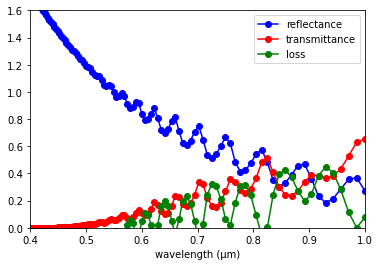

In [20]:
if mp.am_master():
    plt.figure()
    plt.plot(wl,Rs,'bo-',label='reflectance')
    plt.plot(wl,Ts,'ro-',label='transmittance')
    plt.plot(wl,1-Rs-Ts,'go-',label='loss')
    plt.axis([0.4, 1., 0, 1.6])
    plt.xlabel("wavelength (μm)")
    plt.legend(loc="upper right")
    plt.show()